In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, GradientBoostingRegressor
import numpy as np
from sklearn.model_selection import GridSearchCV

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/вышка/диплом

/content/drive/MyDrive/вышка/диплом


In [3]:
dataset = pd.read_csv('dataset_plusextra_nlp_features_target_classes_no_naive.csv',sep='\t')
target = 'raven'
intelligence = target #+ '_classes'
SEED = 42

dataset = dataset[dataset['N_words'] > 2]
dataset = dataset[dataset['raven'] > 0]
df = dataset[[intelligence,
                    'mean_sent_depth',	'max_synt_depth',	'min_synt_depth',
                    'N_acl:relcl',	'N_acl',	'N_advcl',	'N_relative',
                    'mean_freq_ipm',	'mean_freq_d',	'min_freq_ipm',	'min_freq_d',	
                    'N_words',	'mean_Nwords_sent', 'max_Nwords_sent',	'mean_len_words',
                    'max_len_words',	'N_repeated_words',	'N_most_repeated_word',
                    'N_pronn_pers_first', 'N_pronn_pers_sec_third', 'N_adj',
                    'N_adj_degree_compar', 'N_adj_degree_super', 'N_verb_mood_ind',
                    'N_verb_mood_imp', 'N_verb_aspect_imp', 'N_verb_aspect_perf',
                    'N_verb_voice_act', 'N_verb_voice_pass', 'N_verb_voice_mid',
                    'N_verb_tense_past', 'N_verb_tense_pres', 'N_verb_tense_fut'      
                    ]]

train_data, extra_data = train_test_split(df, test_size=0.2,
                                        random_state=SEED)

In [15]:
target_values = ['mean_sent_depth',	'max_synt_depth',	'min_synt_depth',
                    'N_acl:relcl',	'N_acl',	'N_advcl',	'N_relative',
                    'mean_freq_ipm',	'mean_freq_d',	'min_freq_ipm',	'min_freq_d',	
                    'N_words',	'mean_Nwords_sent', 'max_Nwords_sent',	'mean_len_words',
                    'max_len_words',	'N_repeated_words',	'N_most_repeated_word',
                    'N_pronn_pers_first', 'N_pronn_pers_sec_third', 'N_adj',
                    'N_adj_degree_compar', 'N_adj_degree_super', 'N_verb_mood_ind',
                    'N_verb_mood_imp', 'N_verb_aspect_imp', 'N_verb_aspect_perf',
                    'N_verb_voice_act', 'N_verb_voice_pass', 'N_verb_voice_mid',
                    'N_verb_tense_past', 'N_verb_tense_pres', 'N_verb_tense_fut'      
                    ]

def get_x_y(subset):

  y_set = subset[[intelligence]]
  x_set = subset[target_values]
  return x_set, y_set

X_train, y_train = get_x_y(train_data)
X_test, Y_test = get_x_y(extra_data)

In [23]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import mean_squared_error, r2_score
import math
from sklearn.metrics import classification_report
sc = MinMaxScaler()
x_train = sc.fit_transform(X_train)
x_test = sc.transform(X_test)

x_train_df = pd.DataFrame(x_train, columns=target_values) 
x_test_df = pd.DataFrame(x_test, columns=target_values) 

In [7]:
!pip install --quiet shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 9.6 MB/s eta 0:00:00


## Regressor

In [24]:
import xgboost
import shap

params = {
    "objective": "reg:squarederror",
    "n_estimators":1000,
    "max_depth": 10,
    "subsample": 0.8,
    "colsample_bytree": 0.9,
    "colsample_bylevel": 0.8,
    "reg_lambda": 0.3,
    "random_state": 42,
}

model = xgboost.XGBRFRegressor(**params).fit(x_train_df, y_train)

In [25]:
MSE_train = mean_squared_error(y_train, model.predict(x_train_df))
MSE_test = mean_squared_error(Y_test, model.predict(x_test_df))
print(f'RMSE for train: {math.sqrt(MSE_train)}')
print(f'RMSE for test: {math.sqrt(MSE_test)}')

RMSE for train: 2.29018954282673
RMSE for test: 2.891833415588656


In [26]:
r2_score(y_train, model.predict(x_train_df))

0.4053286002579285

In [27]:
r2_score(Y_test, model.predict(x_test_df))

0.07773188357695937

In [ ]:
!pip install pdpbox

In [10]:
from pdpbox import pdp, get_dataset, info_plots

## SHAP interpretator

In [ ]:
explainer = shap.Explainer(model)
shap_values = explainer(x_test_df)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


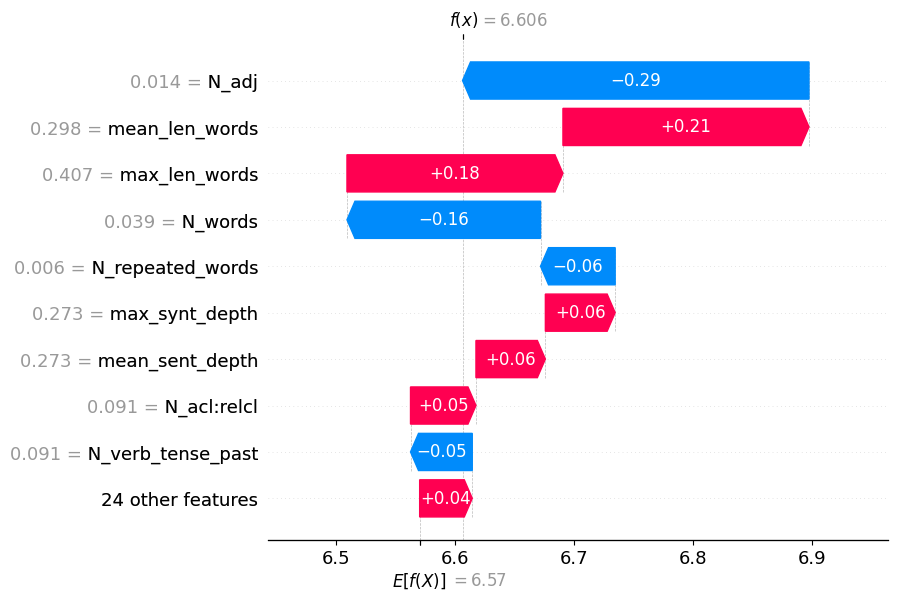

In [ ]:
shap.plots.waterfall(shap_values[0])

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


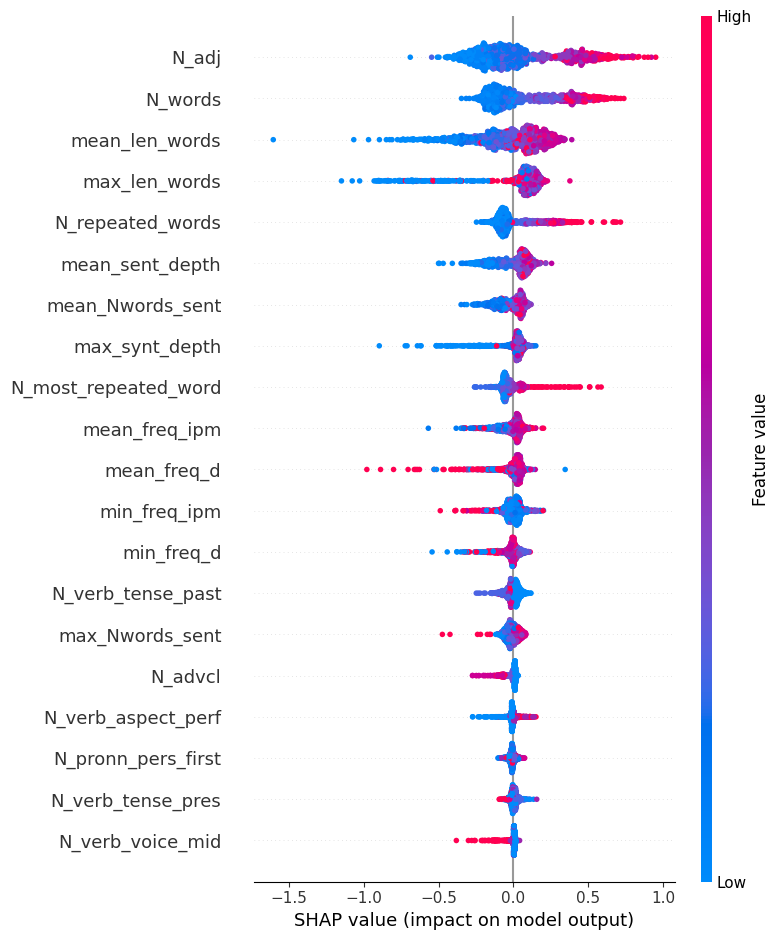

In [ ]:
shap.summary_plot(shap_values, x_test_df)

In [31]:
import matplotlib.pyplot as plt

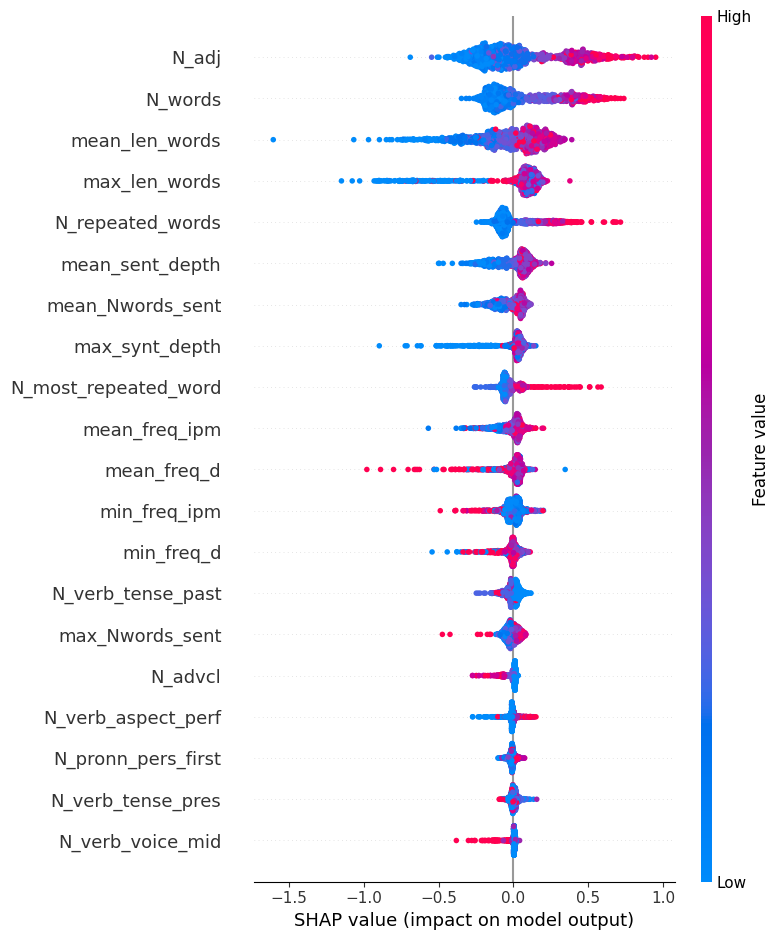

In [ ]:
shap.summary_plot(shap_values, x_test_df, show=False)
plt.savefig("features/plots/raven.png")
plt.show()

## PDPplots

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5056 entries, 1204 to 873
Data columns (total 34 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   raven                   5056 non-null   float64
 1   mean_sent_depth         5056 non-null   float64
 2   max_synt_depth          5056 non-null   int64  
 3   min_synt_depth          5056 non-null   int64  
 4   N_acl:relcl             5056 non-null   int64  
 5   N_acl                   5056 non-null   int64  
 6   N_advcl                 5056 non-null   int64  
 7   N_relative              5056 non-null   int64  
 8   mean_freq_ipm           5056 non-null   float64
 9   mean_freq_d             5056 non-null   float64
 10  min_freq_ipm            5056 non-null   float64
 11  min_freq_d              5056 non-null   float64
 12  N_words                 5056 non-null   int64  
 13  mean_Nwords_sent        5056 non-null   float64
 14  max_Nwords_sent         5056 non-null 

In [ ]:
Y_test['raven'].tolist()

In [20]:
x_test_df

,mean_sent_depth,max_synt_depth,min_synt_depth,N_acl:relcl,N_acl,N_advcl,N_relative,mean_freq_ipm,mean_freq_d,min_freq_ipm,...,N_verb_mood_imp,N_verb_aspect_imp,N_verb_aspect_perf,N_verb_voice_act,N_verb_voice_pass,N_verb_voice_mid,N_verb_tense_past,N_verb_tense_pres,N_verb_tense_fut,predicted
0,0.272727,0.272727,0.272727,0.090909,0.000000,0.0,0.045455,0.176459,0.729772,0.000763,...,0.0,0.000000,0.125,0.058824,0.0,0.000000,0.090909,0.000000,0.0,6.606093
1,0.181818,0.181818,0.181818,0.000000,0.000000,0.1,0.045455,0.139273,0.872068,0.000654,...,0.0,0.000000,0.000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,5.777975
2,0.131818,0.272727,0.045455,0.000000,0.000000,0.1,0.045455,0.210627,0.786070,0.000490,...,0.0,0.400000,0.000,0.294118,0.0,0.142857,0.090909,0.333333,0.0,7.411390
3,0.190909,0.318182,0.045455,0.181818,0.285714,0.0,0.181818,0.151171,0.773930,0.000763,...,0.0,0.133333,0.125,0.117647,0.0,0.142857,0.181818,0.066667,0.0,7.984487
4,0.118182,0.227273,0.000000,0.000000,0.000000,0.0,0.000000,0.148263,0.752836,0.000708,...,0.0,0.200000,0.000,0.058824,0.0,0.285714,0.000000,0.200000,0.0,7.002439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1259,0.318182,0.318182,0.318182,0.090909,0.000000,0.2,0.136364,0.064449,0.680516,0.000000,...,0.0,0.066667,0.000,0.058824,0.0,0.000000,0.000000,0.066667,0.0,7.258939
1260,0.272727,0.272727,0.272727,0.000000,0.000000,0.0,0.000000,0.062018,0.710448,0.000136,...,0.0,0.066667,0.000,0.058824,0.0,0.000000,0.000000,0.066667,0.0,6.761039
1261,0.268182,0.409091,0.090909,0.454545,0.285714,0.3,0.454545,0.156773,0.731487,0.000136,...,0.0,0.133333,0.125,0.176471,0.0,0.000000,0.181818,0.066667,0.0,8.518045
1262,0.090909,0.090909,0.090909,0.000000,0.000000,0.0,0.000000,0.013034,0.671642,0.054192,...,0.0,0.000000,0.000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,5.687696


In [28]:
x_test_df['predicted_raven'] = model.predict(x_test_df)

In [32]:
def get_pdp_plot_figs(feature, target_param):

  fig, axes, summary_df = info_plots.target_plot(
      df=x_test_df, 
      feature=feature, feature_name=feature, target=f'predicted_{target_param}'
  )

  plt.savefig(f'features/plots/{target_param}_pdp/pdpplot_{target_param}_{feature}.png')

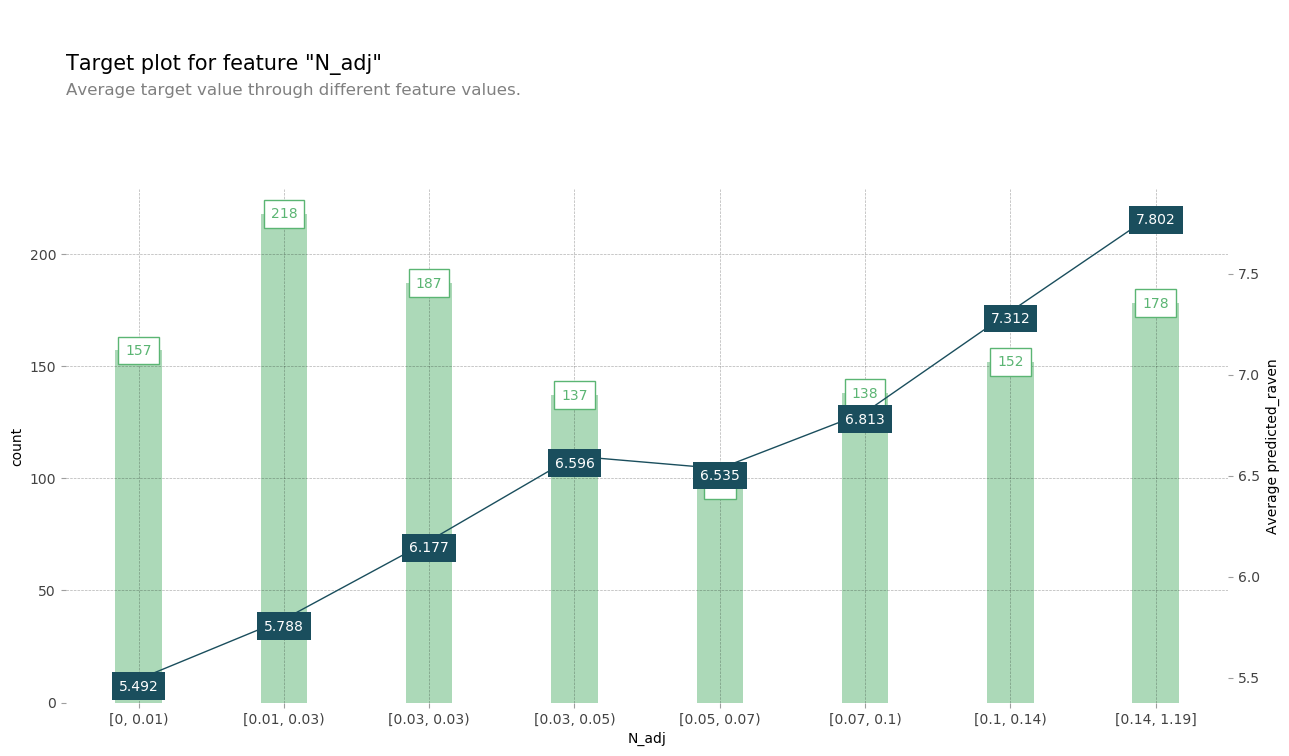

In [33]:
get_pdp_plot_figs('N_adj', 'raven')

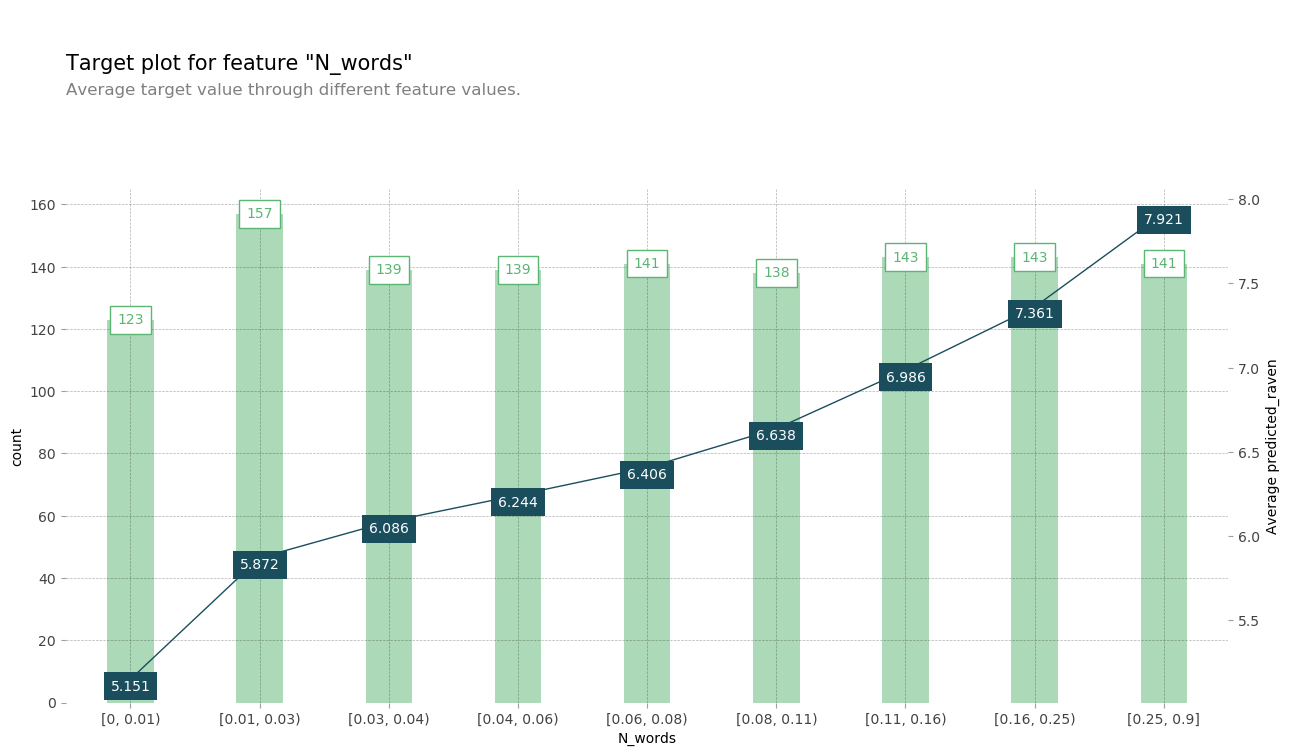

In [34]:
get_pdp_plot_figs('N_words', 'raven')

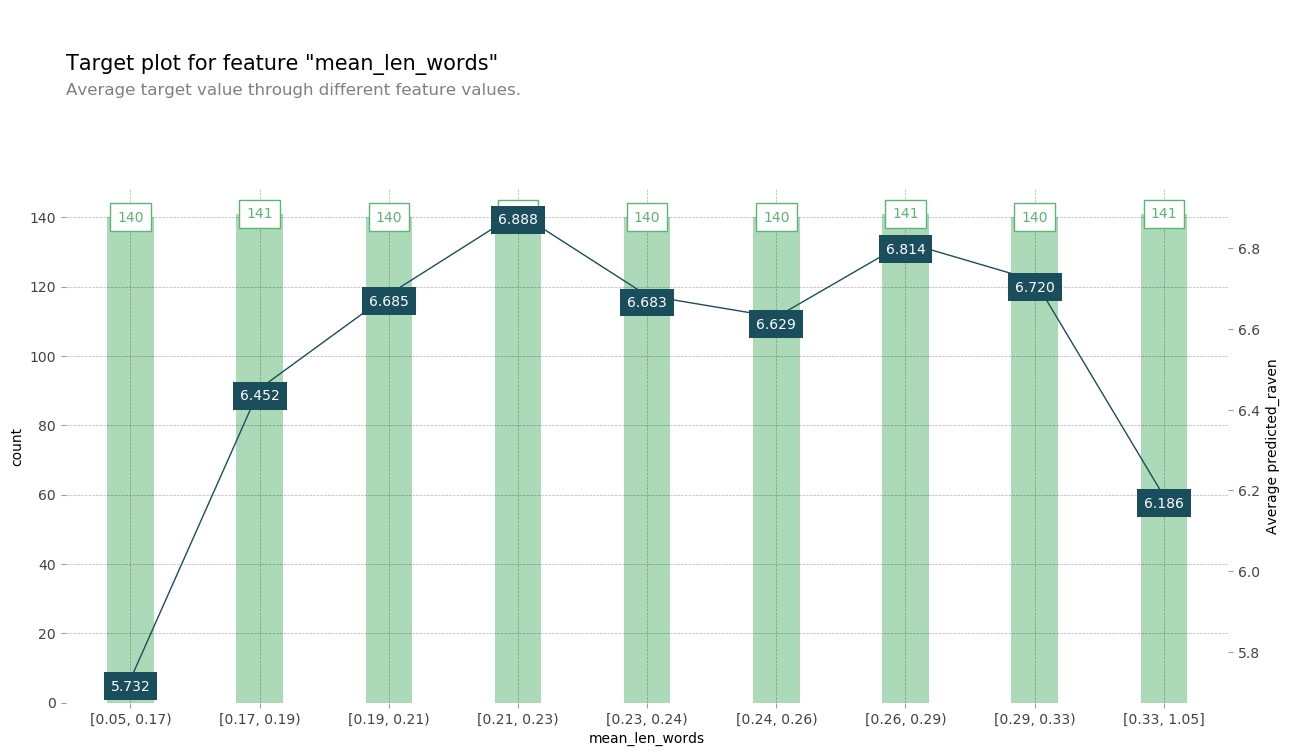

In [35]:
#  mean_len_words
get_pdp_plot_figs('mean_len_words', 'raven')

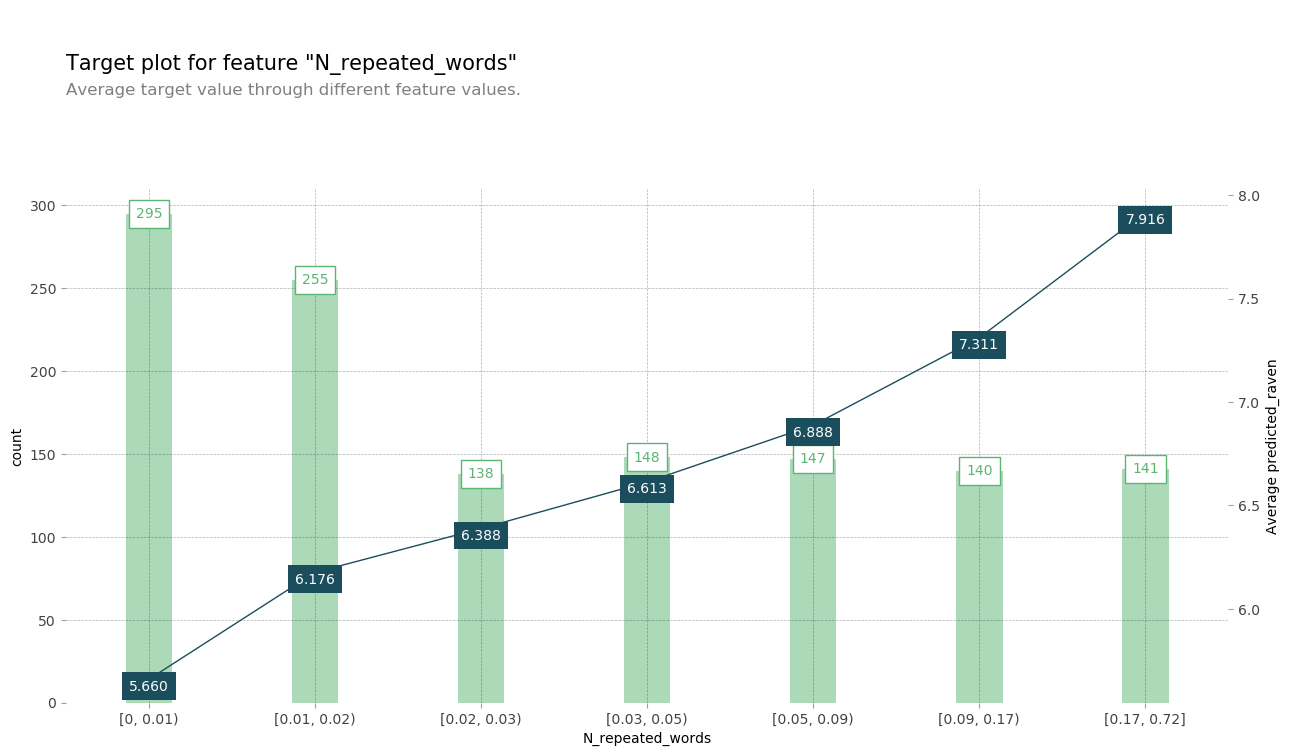

In [36]:
get_pdp_plot_figs('N_repeated_words', 'raven')

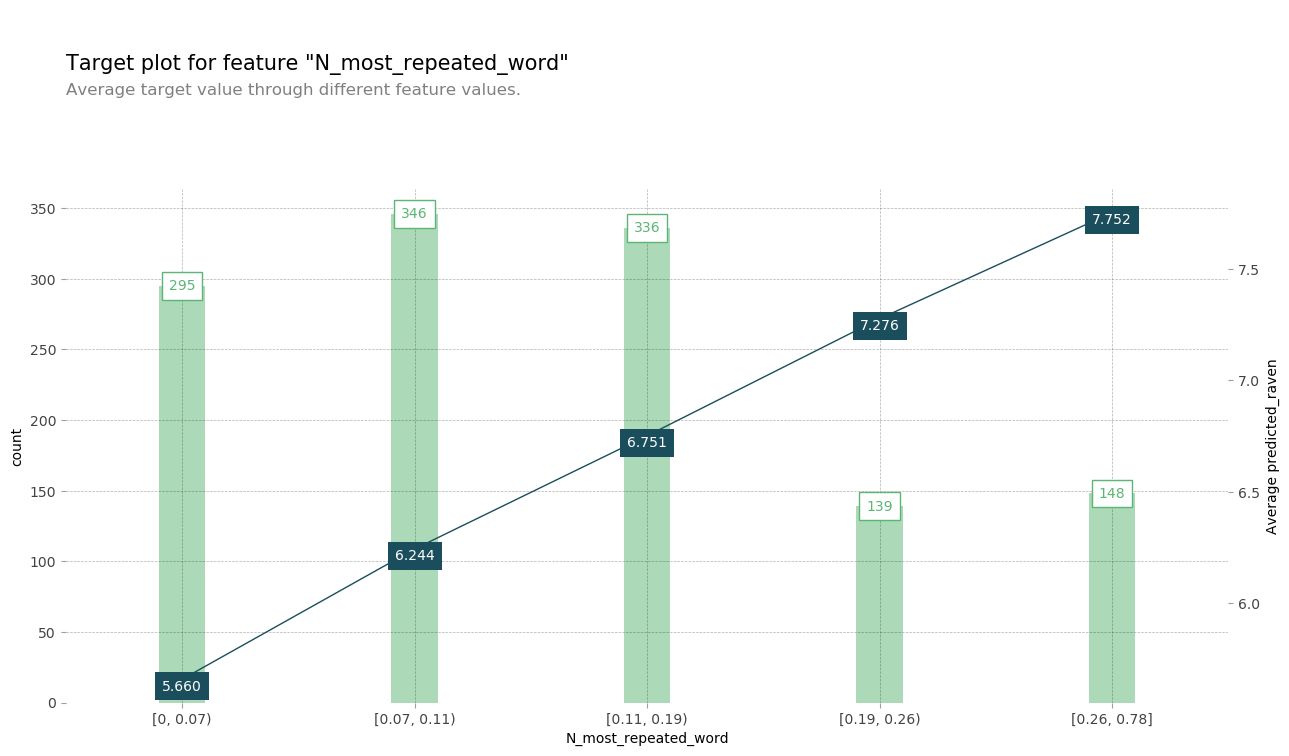

In [37]:
get_pdp_plot_figs('N_most_repeated_word', 'raven')

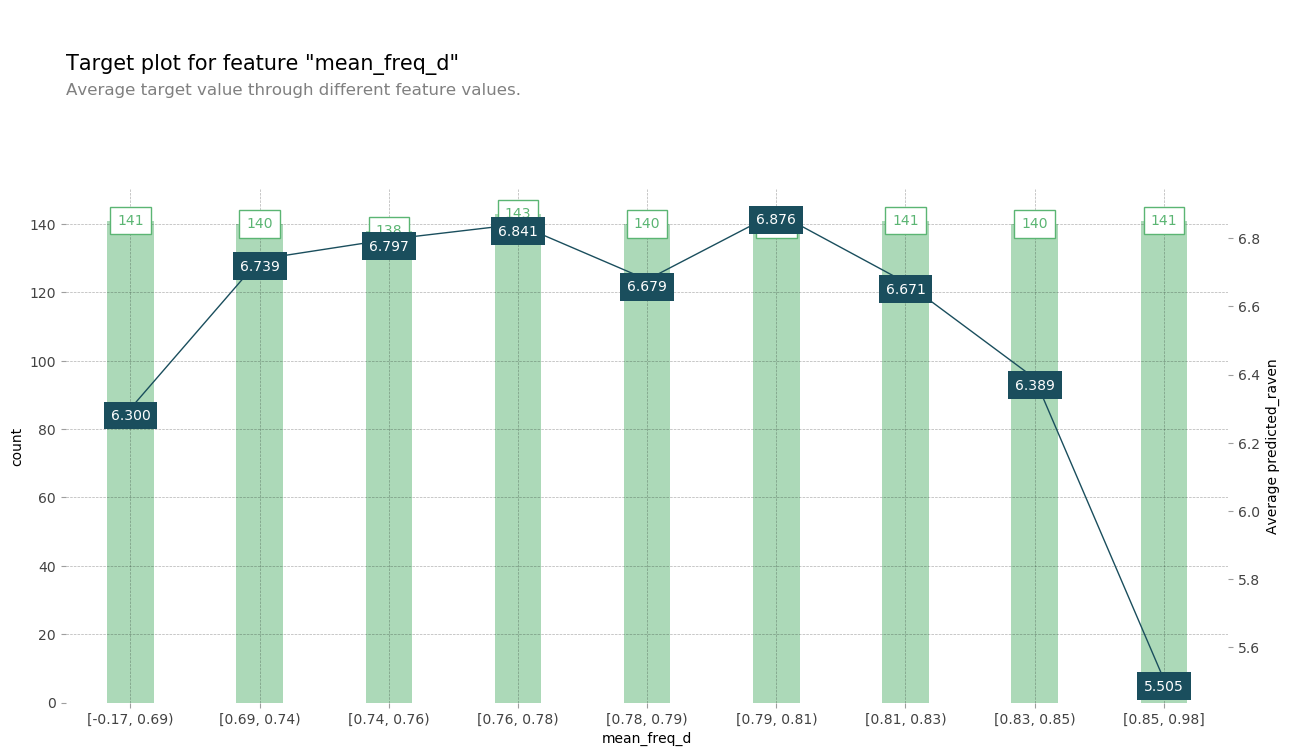

In [38]:
get_pdp_plot_figs('mean_freq_d', 'raven')

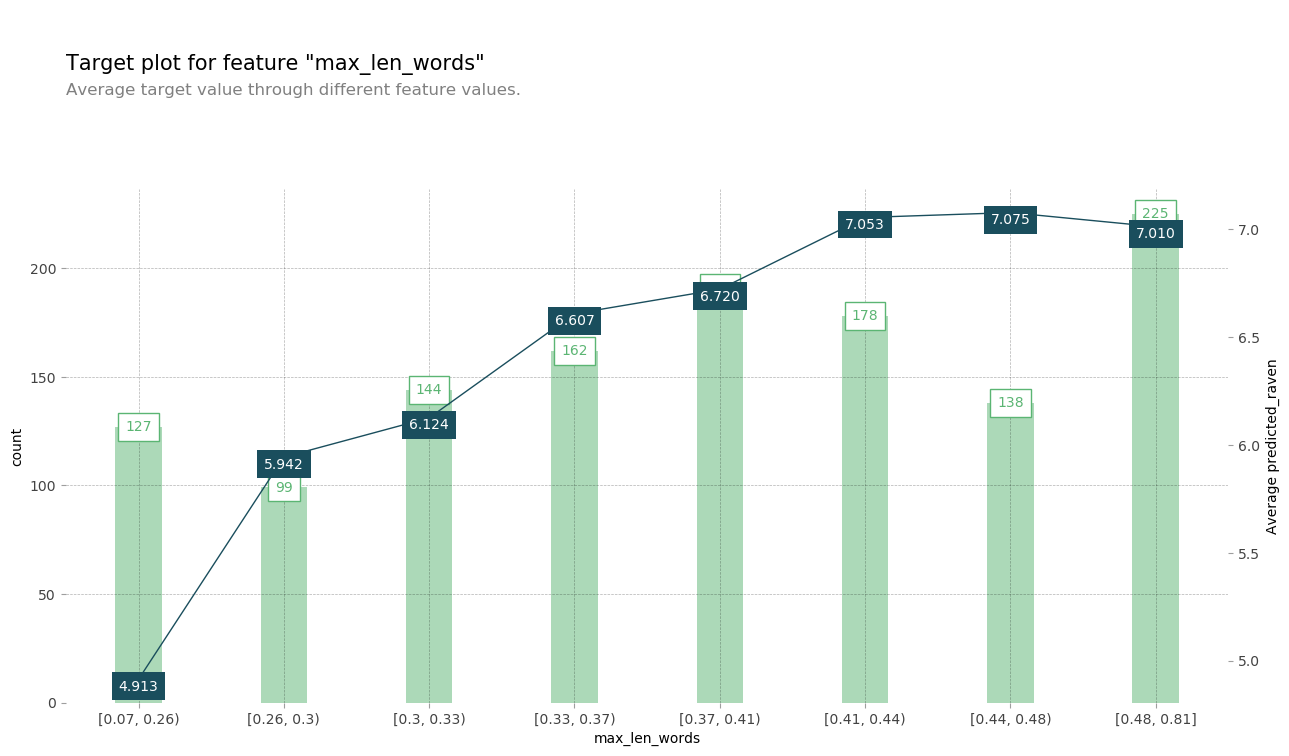

In [39]:
get_pdp_plot_figs('max_len_words', 'raven')

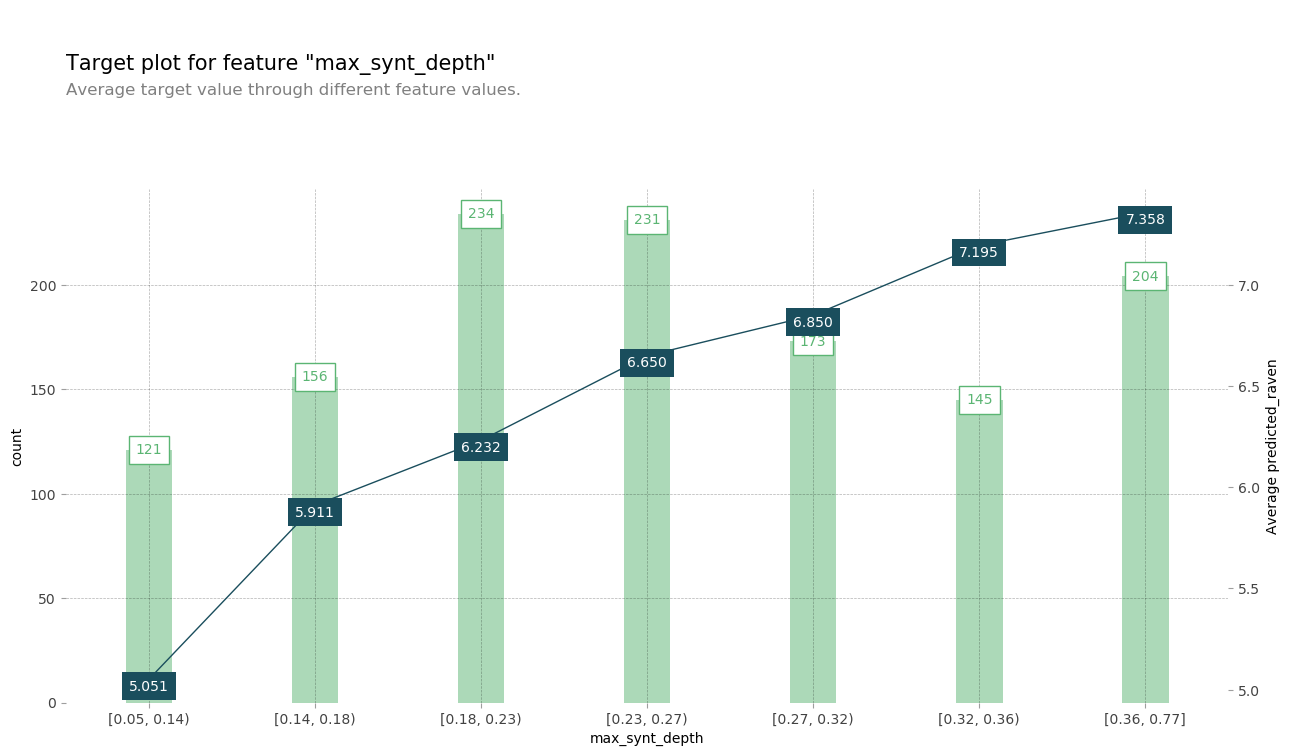

In [40]:
# max_synt_depth
get_pdp_plot_figs('max_synt_depth', 'raven')

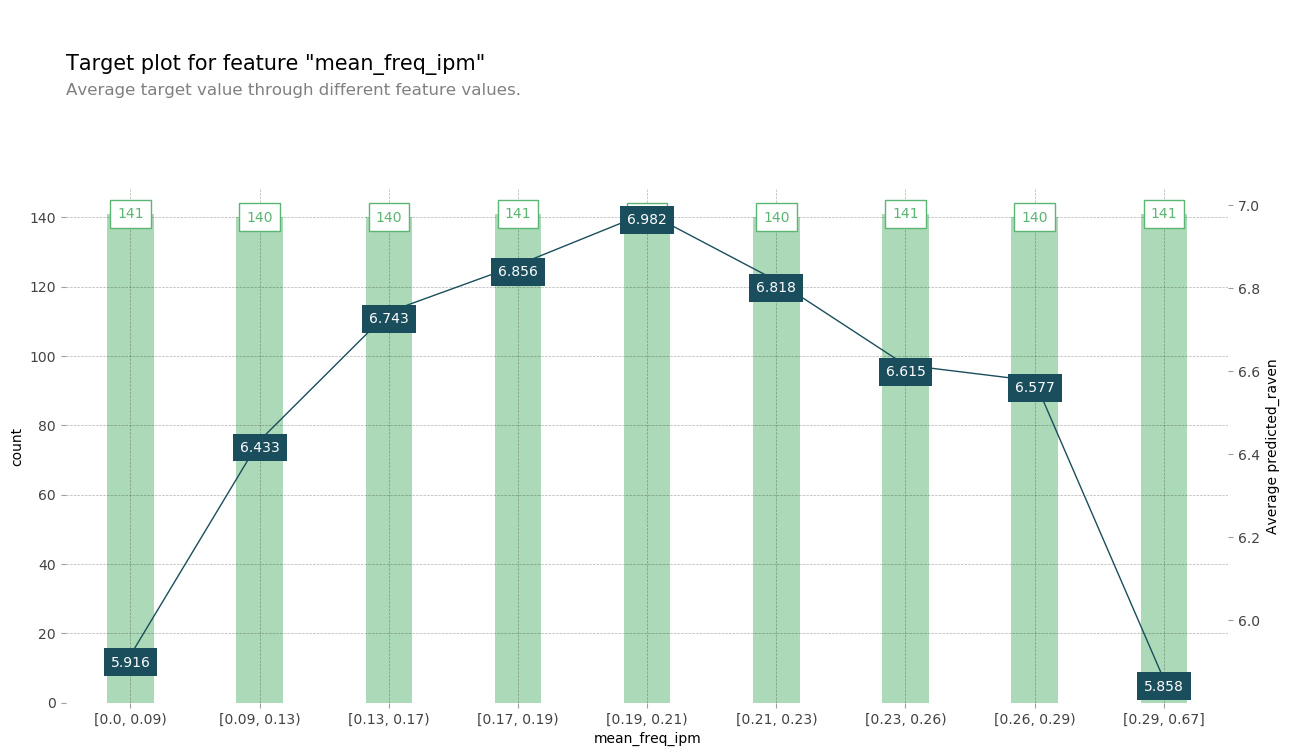

In [41]:
get_pdp_plot_figs('mean_freq_ipm', 'raven')

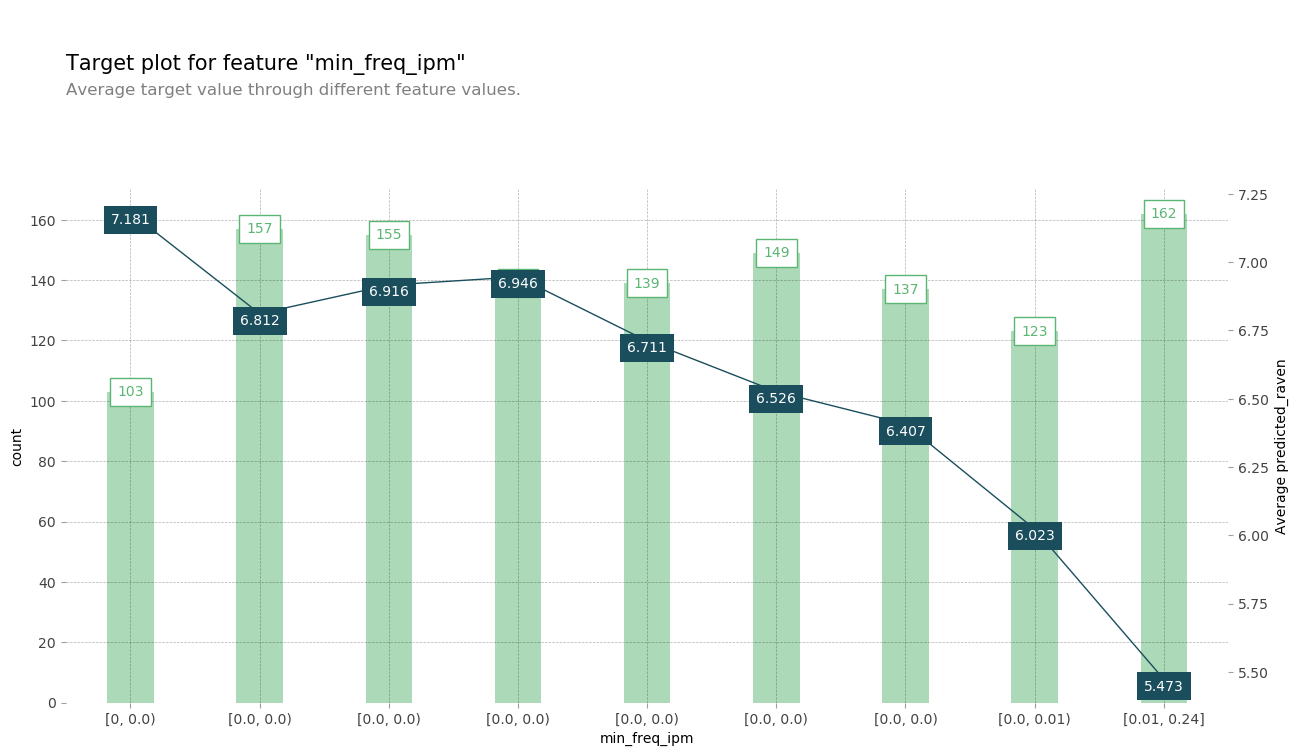

In [42]:
get_pdp_plot_figs('min_freq_ipm', 'raven')

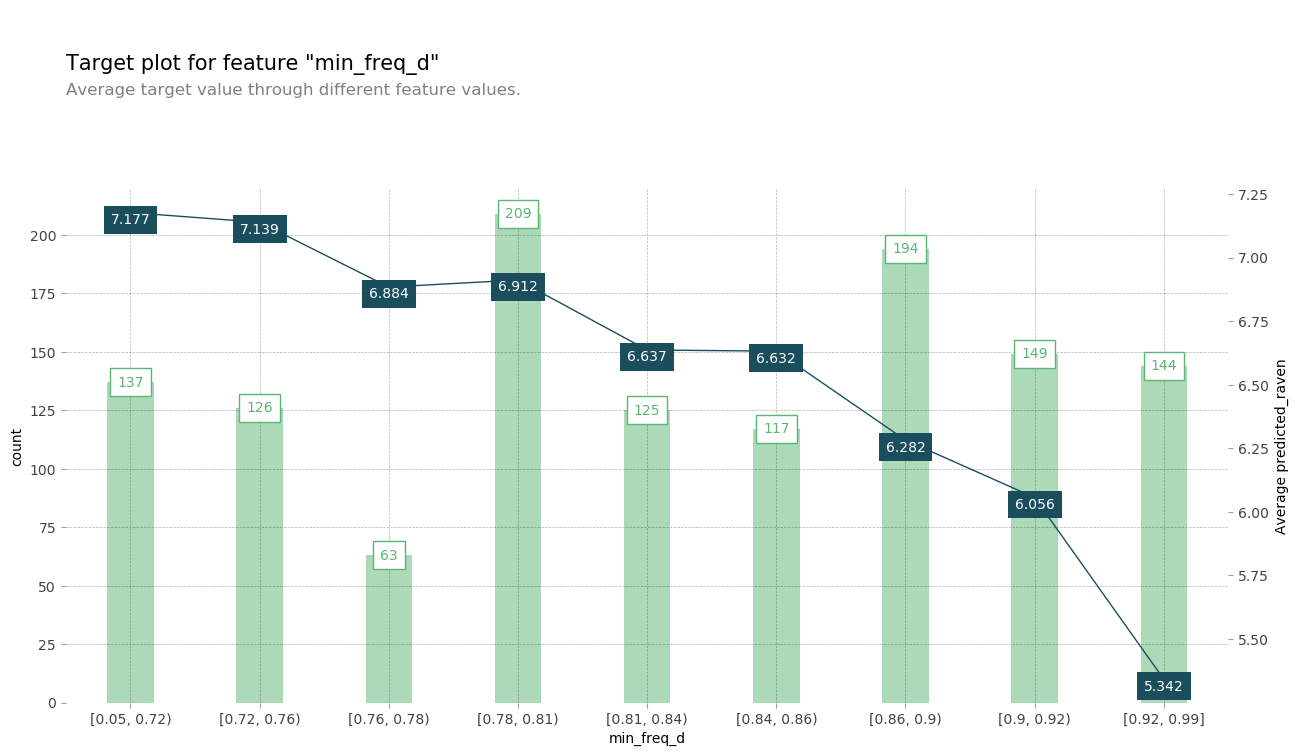

In [43]:
get_pdp_plot_figs('min_freq_d', 'raven')